# Exercise 3 - Input Scaling and Regularization

Part of this exercise is taken from http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#results

# Table of Contents

* [1 Loading the dataset](#Loading-the-dataset)
* [2 Comparison of different input scaling](#Comparison-of-different-input-scaling)
* [3 A DNN for regression](#A-DNN-for-regression)
* [4 Regularization](#Regularization)
    

# Loading the dataset

### Task 1: For this exercise we want to use the <a href="http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html">california housing dataset</a> from scikit learn. Prepare the dataset in the following way:
* Load the dataset (`fetch_california_housing`), inspect it and create a pandas `DataFrame` with name `df`.
* What kind of problem is this?
* How many example and how many features do we have? What are the features? What is the target?
* How does the target look like?
* Make 2D scatter plots of all input features, where the z-axis shows the target dependence.
* What do you observe?


In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
import pandas as pd

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
8    -122.26  
9    -122.25

Text(0,0.5,'Number')

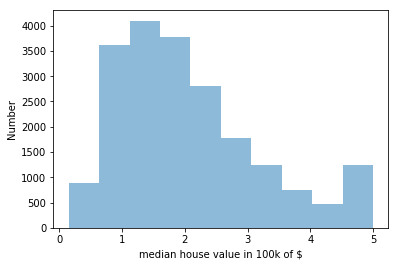

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(housing.target, alpha=0.5)
plt.xlabel('median house value in 100k of $')
plt.ylabel('Number')

In [4]:
df.shape

(20640, 8)

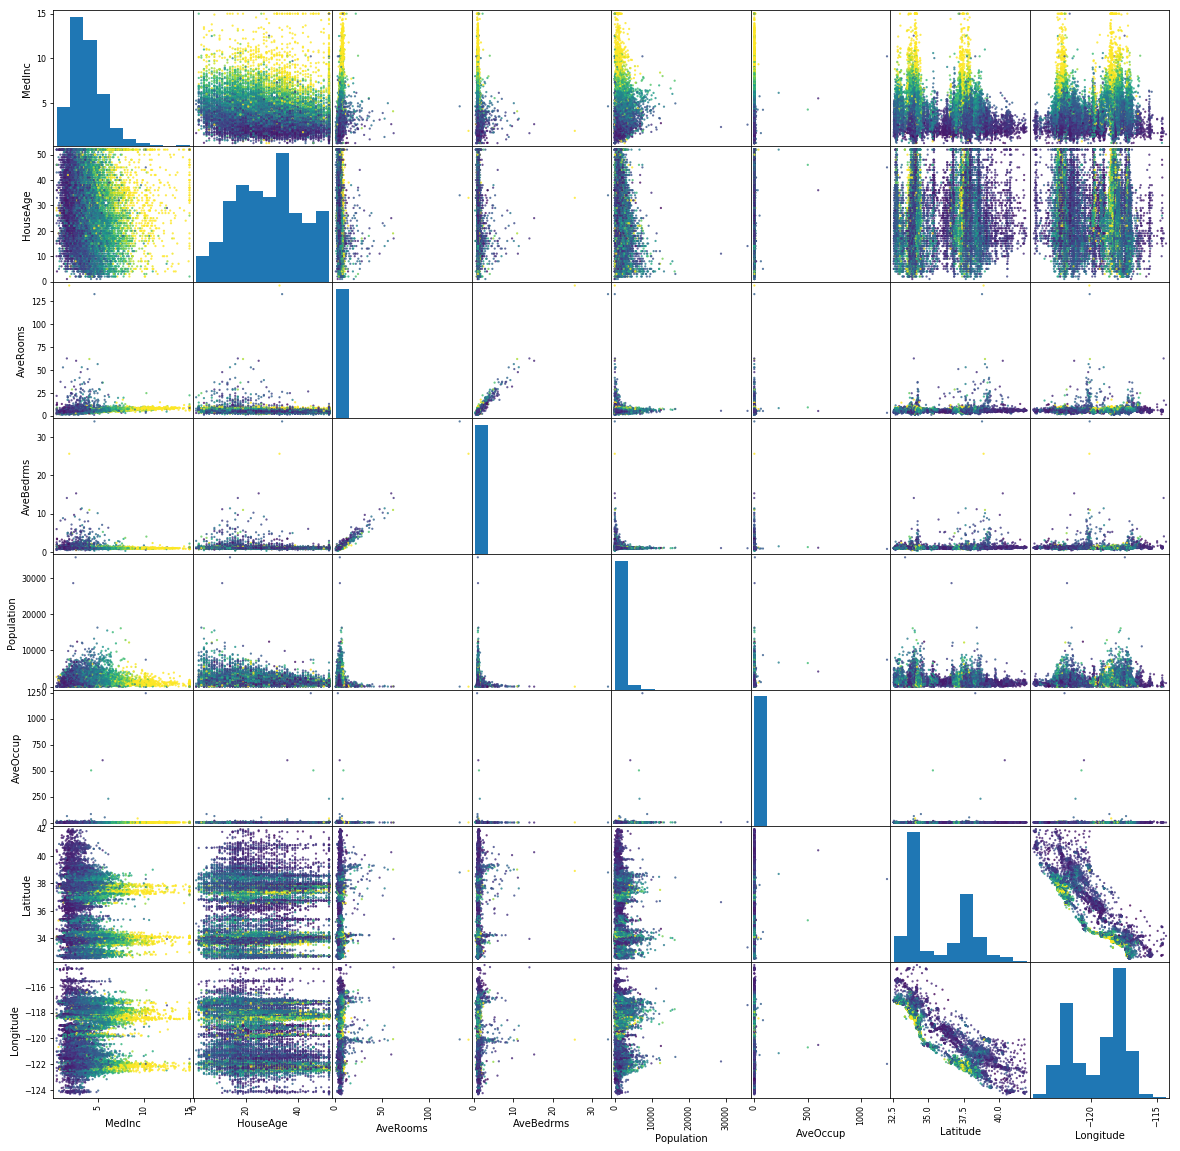

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=housing.target, alpha=0.8, figsize=(20, 20), s=20)
plt.show()

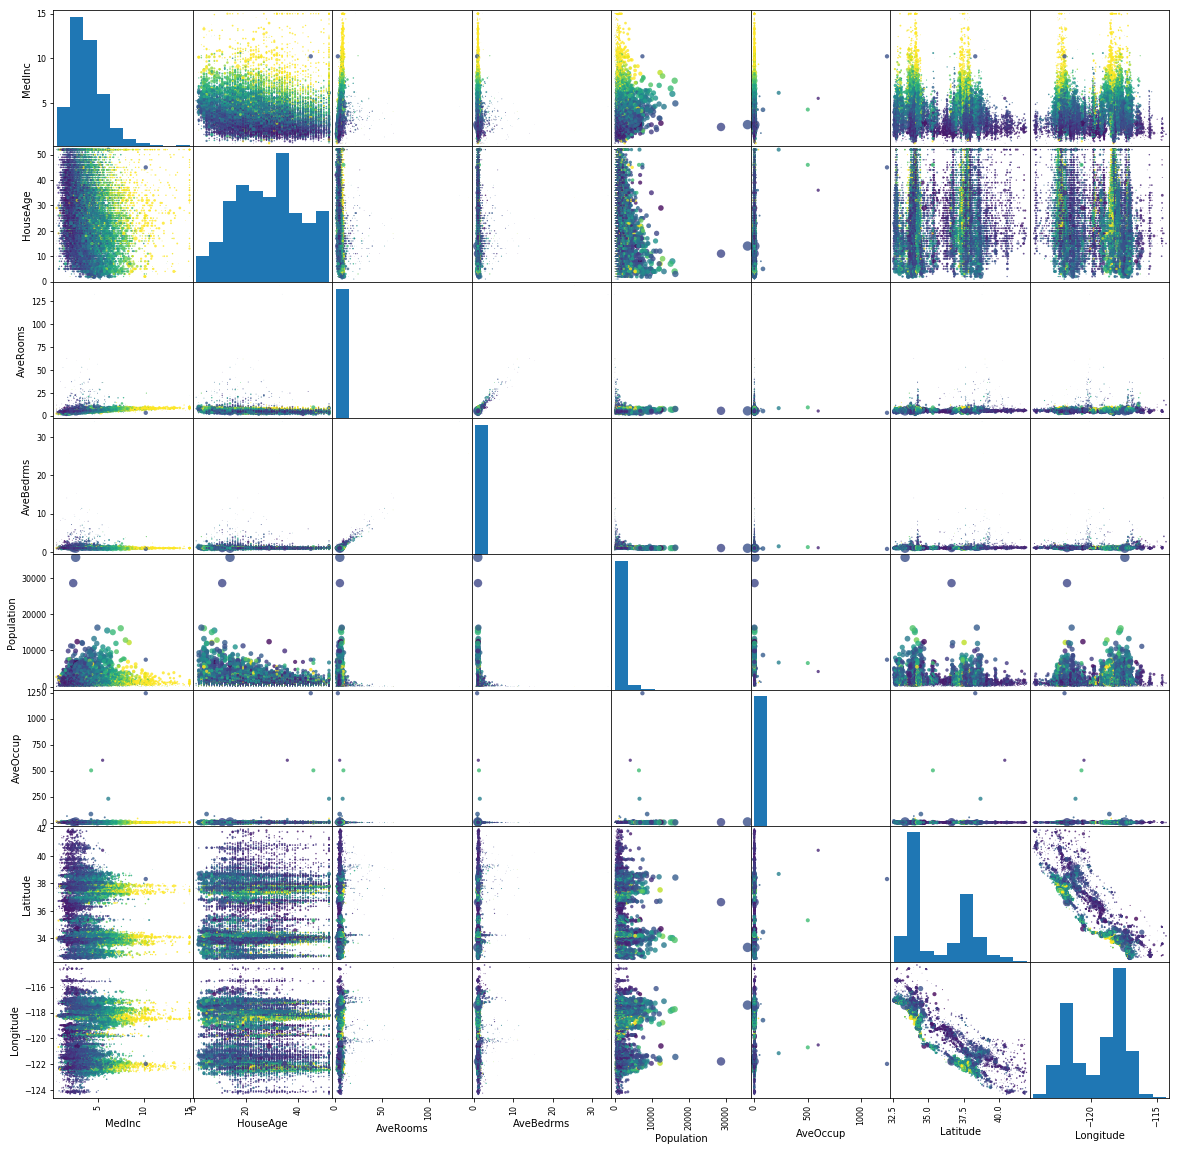

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=housing.target, alpha=0.8, figsize=(20, 20), s=df["Population"]/100)
plt.show()

# Comparison of different input scaling

Text(0,0.5,'Average Occupation')

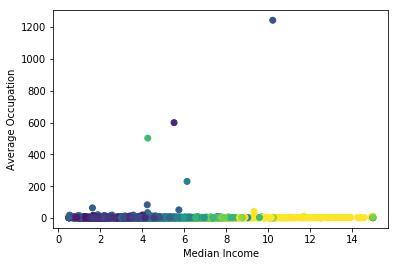

In [7]:
plt.scatter(df['MedInc'], df['AveOccup'], c=housing.target)
plt.xlabel('Median Income')
plt.ylabel('Average Occupation')

Feature 0 (median income in a block) and feature 5 (number of households) of the California housing dataset
have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms. Unscaled data can also slow down or even prevent the convergence of many gradient-based estimators.

Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. In particular, metric-based and gradient-based estimators often assume approximately standardized data (centered features with unit variances). A notable exception are decision tree-based estimators that are robust to arbitrary scaling of the data.

This example uses different scalers, transformers, and normalizers to bring the data within a pre-defined range.

Scalers are linear (or more precisely affine) transformers and differ from each other in the way to estimate the parameters used to shift and scale each feature.

QuantileTransformer provides a non-linear transformation in which distances between marginal outliers and inliers are shrunk.

Unlike the previous transformations, normalization refers to a per sample transformation instead of a per feature transformation.

## Scaling the target

In [8]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

It often makes sense to scale the target of a regression to something between 0 and 1, because that way you can use activation functions in the output layer which map to that range. 
If you use functions like sigmoid in the output layer, this keeps the backpropagated error within limits, unlike the case of unbounded linear activation functions. You could even scale to ranges like [0.3, 0.7] in order to focus on the almost linear-part of the sigmoid function.
In the following we will scale the target between 0 and 1 also for plotting reasons. We will use the minmax_scale for that

In [9]:
from sklearn.preprocessing import minmax_scale
y_full=housing.target
y = minmax_scale(y_full, feature_range=(0, 1))
y

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

## Scaling the input

We will focus in the following on the median income [0] and number of households [5] scatter plot and how different scalings impact their range.

In [10]:
X = housing.data[:, [0, 5]]

In the following, I have taken the scaling and plotting code from  http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#results.

You don't need to understand how the scaling and plotting is done for now, but the purpose is mainly to demonstrate how different scalers impact your input

In [11]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))
]

In [12]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Two plots will be shown for each scaler/normalizer/transformer. The left figure will show a scatter plot of the full data set while the right figure will exclude the extreme values considering only 99 % of the data set, excluding marginal outliers. In addition, the marginal distributions for each feature will be shown on the side of the scatter plot.



In [13]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')


Original data
-------------

Each transformation is plotted showing two transformed features, with the
left plot showing the entire dataset, and the right zoomed-in to show the
dataset without the marginal outliers. A large majority of the samples are
compacted to a specific range, [0, 10] for the median income and [0, 6] for
the number of households. Note that there are some marginal outliers (some
blocks have more than 1200 households). Therefore, a specific pre-processing
can be very beneficial depending of the application. In the following, we
present some insights and behaviors of those pre-processing methods in the
presence of marginal outliers.



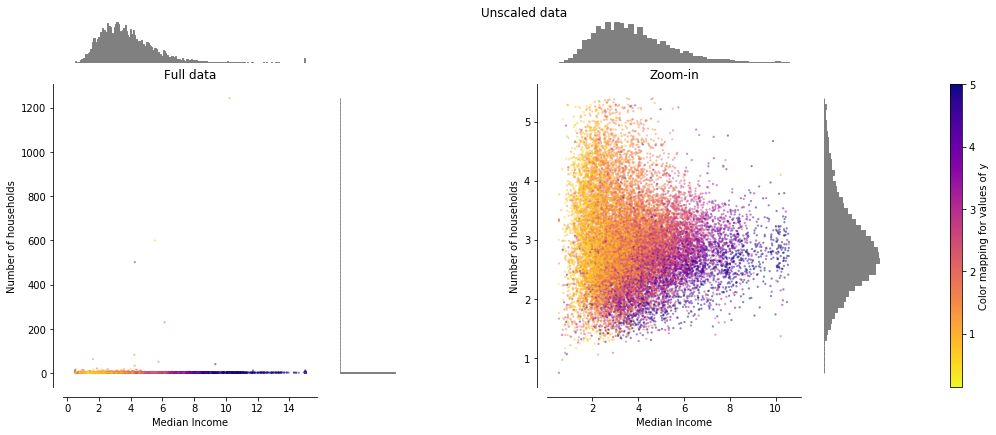

In [14]:
make_plot(0)

StandardScaler
--------------

``StandardScaler`` removes the mean (0) and scales the data to unit variance (1).
However, the outliers have an influence when computing the empirical mean and
standard deviation which shrink the range of the feature values as shown in
the left figure below. Note in particular that because the outliers on each
feature have different magnitudes, the spread of the transformed data on
each feature is very different: most of the data lie in the [-2, 4] range for
the transformed median income feature while the same data is squeezed in the
smaller [-0.2, 0.2] range for the transformed number of households.

``StandardScaler`` therefore cannot guarantee balanced feature scales in the
presence of outliers.



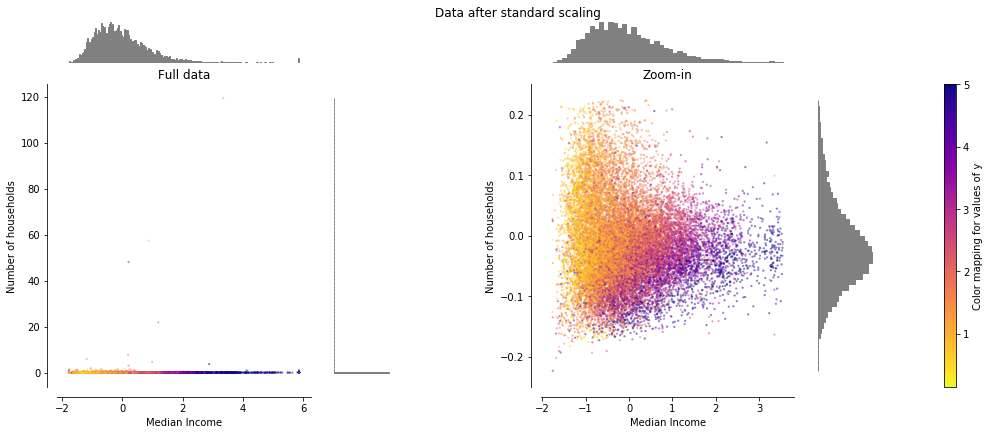

In [15]:
make_plot(1)

MinMaxScaler
------------

``MinMaxScaler`` rescales the data set such that all feature values are in
the range [0, 1] as shown in the right panel below. However, this scaling
compress all inliers in the narrow range [0, 0.005] for the transformed
number of households.

As ``StandardScaler``, ``MinMaxScaler`` is very sensitive to the presence of
outliers.



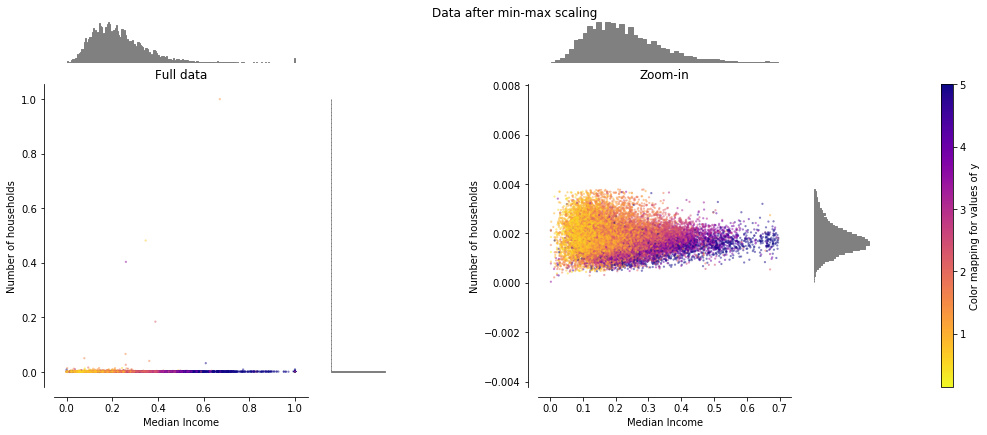

In [16]:
make_plot(2)

MaxAbsScaler
------------

``MaxAbsScaler`` differs from the previous scaler such that the absolute
values are mapped in the range [0, 1]. On positive only data, this scaler
behaves similarly to ``MinMaxScaler`` and therefore also suffers from the
presence of large outliers.



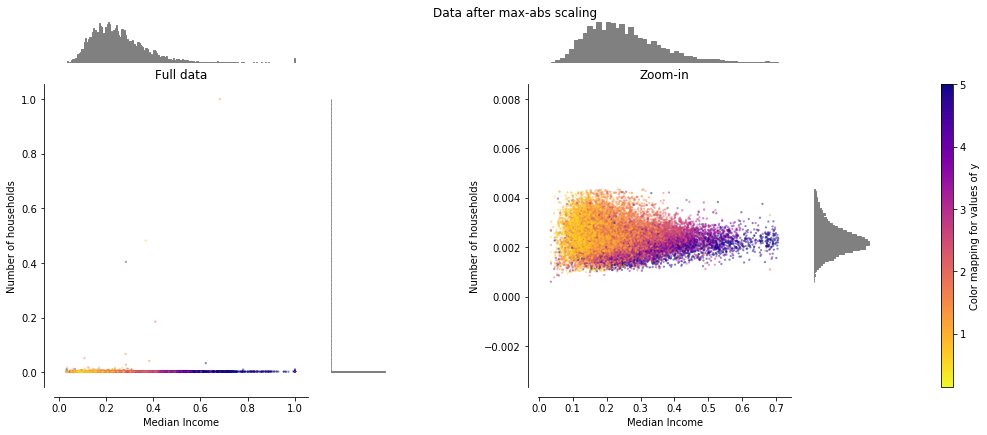

In [17]:
make_plot(3)

RobustScaler
------------

Unlike the previous scalers, the centering and scaling statistics of this
scaler are based on percentiles and are therefore not influenced by a few
number of very large marginal outliers. Consequently, the resulting range of
the transformed feature values is larger than for the previous scalers and,
more importantly, are approximately similar: for both features most of the
transformed values lie in a [-2, 3] range as seen in the zoomed-in figure.
Note that the outliers themselves are still present in the transformed data.
If a separate outlier clipping is desirable, a non-linear transformation is
required (see below).



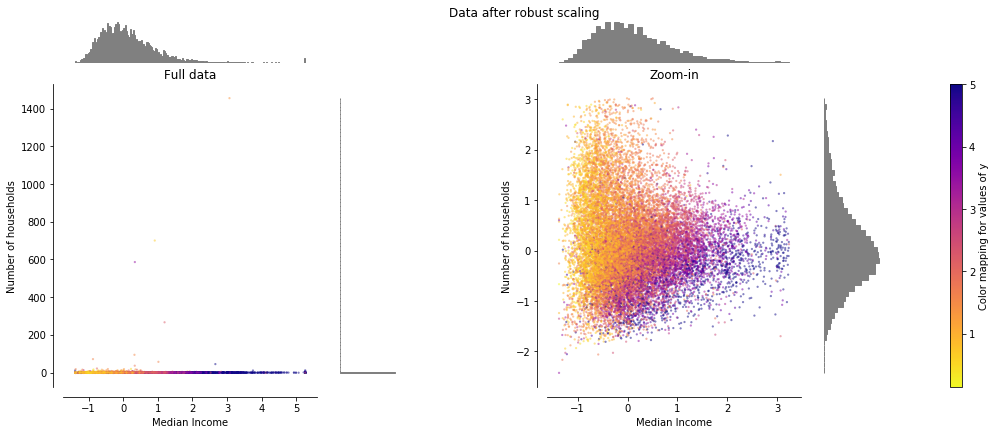

In [18]:
make_plot(4)

QuantileTransformer (uniform output)
------------------------------------

``QuantileTransformer`` applies a non-linear transformation such that the
probability density function of each feature will be mapped to a uniform
distribution. In this case, all the data will be mapped in the range [0, 1],
even the outliers which cannot be distinguished anymore from the inliers.

As ``RobustScaler``, ``QuantileTransformer`` is robust to outliers in the
sense that adding or removing outliers in the training set will yield
approximately the same transformation on held out data. But contrary to
``RobustScaler``, ``QuantileTransformer`` will also automatically collapse
any outlier by setting them to the a priori defined range boundaries (0 and
1).



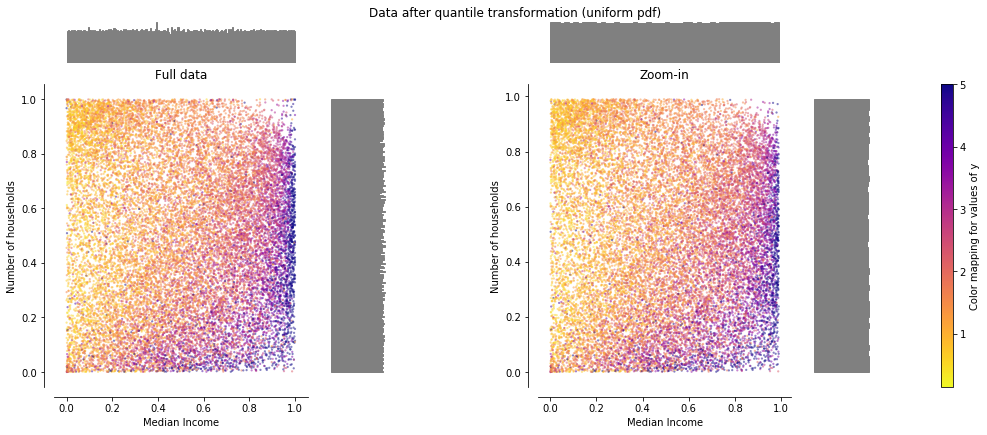

In [19]:
make_plot(5)

QuantileTransformer (Gaussian output)
-------------------------------------

``QuantileTransformer`` has an additional ``output_distribution`` parameter
allowing to match a Gaussian distribution instead of a uniform distribution.
Note that this non-parametetric transformer introduces saturation artifacts
for extreme values.



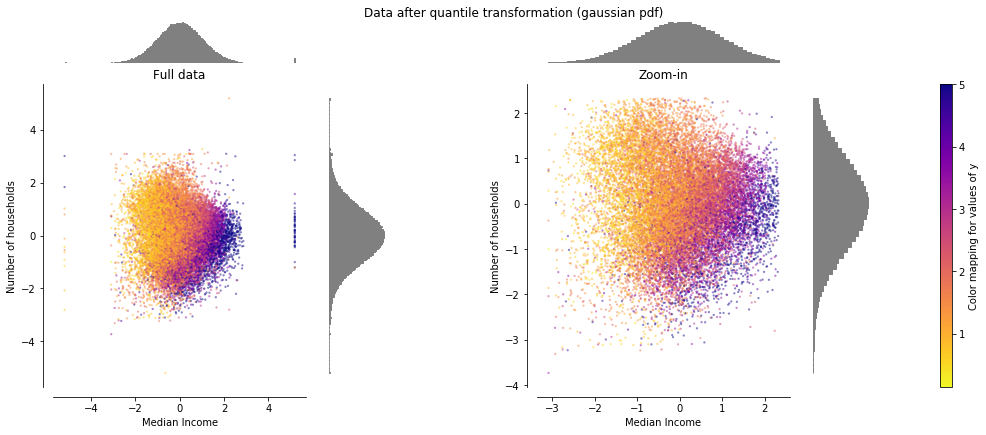

In [20]:
make_plot(6)

Normalizer
----------

The ``Normalizer`` rescales the vector for each sample to have unit norm,
independently of the distribution of the samples. It can be seen on both
figures below where all samples are mapped onto the unit circle. In our
example the two selected features have only positive values; therefore the
transformed data only lie in the positive quadrant. This would not be the
case if some original features had a mix of positive and negative values.



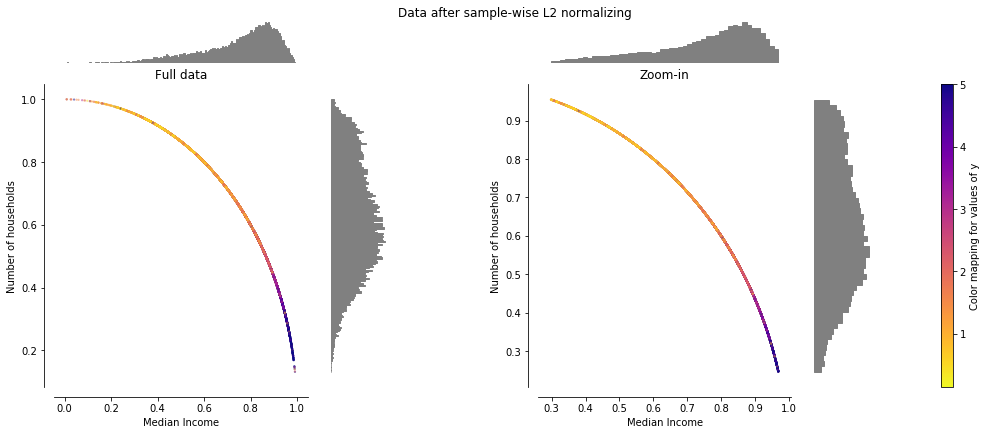

In [21]:
make_plot(7)
plt.show()

## Which scaler should we use?

Let's have a closer look at the robust scaler on our entire dataset:

In [22]:
df_robust = pd.DataFrame(RobustScaler(quantile_range=(25, 75)).fit_transform(df), columns=housing.feature_names)
df_robust.head(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.197582  0.631579  1.088935  -0.267221   -0.899787 -0.307981  0.957672   
1  2.186664 -0.421053  0.626066  -0.822926    1.316631 -0.830800  0.952381   
2  1.707732  1.210526  1.898042   0.263955   -0.714286 -0.018599  0.949735   
3  0.967177  1.210526  0.364978   0.259814   -0.648188 -0.316908  0.949735   
4  0.142854  1.210526  0.653191   0.345657   -0.640725 -0.746784  0.949735   
5  0.230291  1.210526 -0.290055   0.586926   -0.802772 -0.795547  0.949735   
6  0.057022  1.210526 -0.184419  -1.042501   -0.076759 -0.809026  0.947090   
7 -0.190288  1.210526 -0.267799   0.139580   -0.009595 -1.208021  0.947090   
8 -0.667202  0.684211 -0.580152   0.736958    0.042644 -0.928102  0.947090   
9  0.071748  1.210526 -0.160418  -0.626926    0.410448 -0.757574  0.947090   

   Longitude  
0  -0.986807  
1  -0.984169  
2  -0.989446  
3  -0.992084  
4  -0.992084  
5  -0.992084  
6  -0.992084  
7  -0.992084  
8  -0.994723  
9  -0.992084

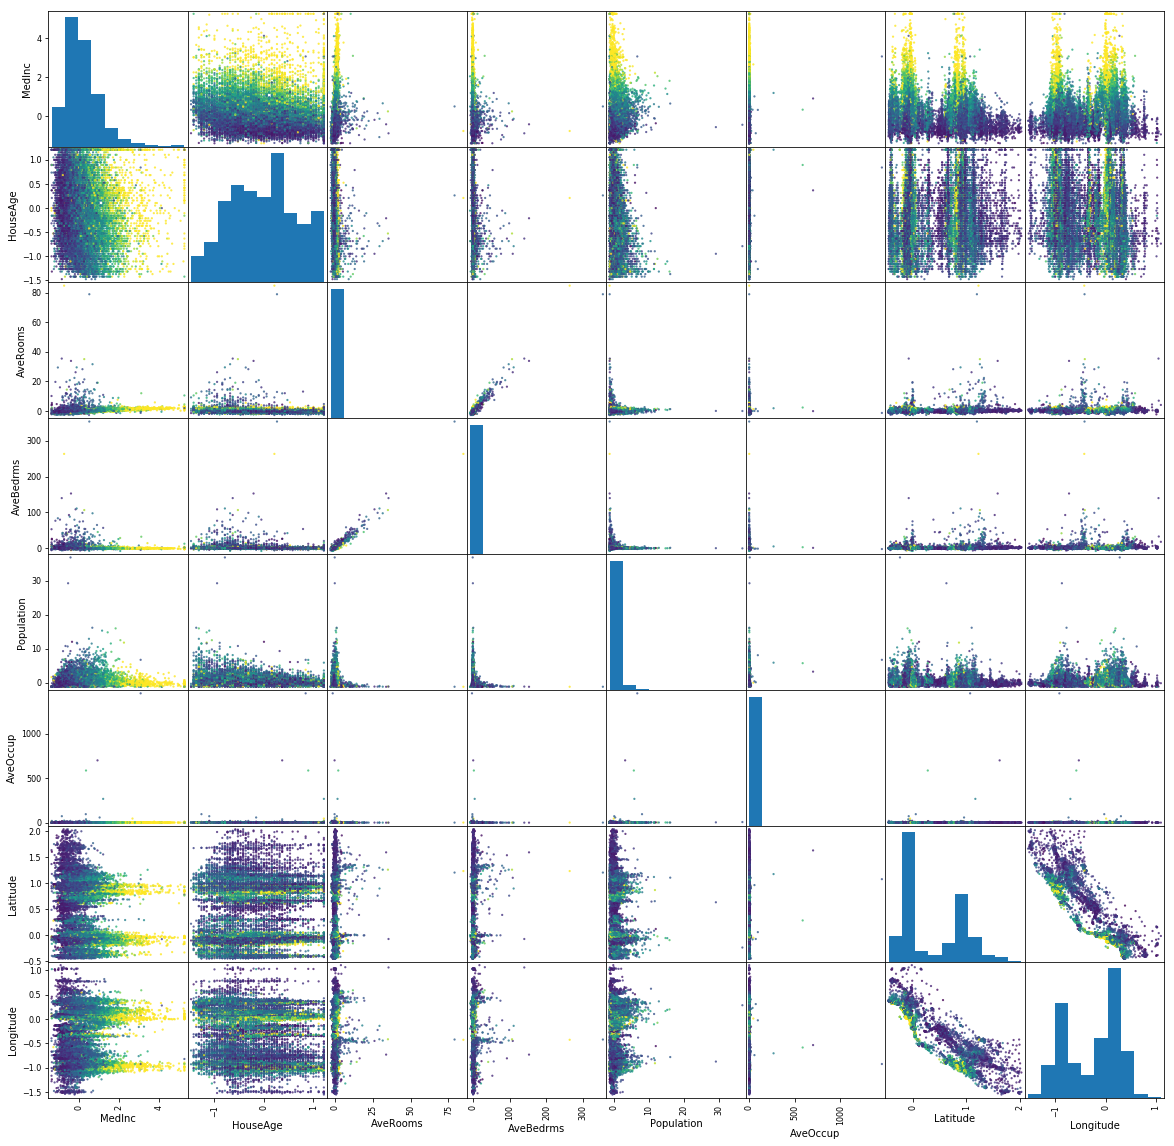

In [23]:
scatter_matrix(df_robust, c=housing.target, alpha=0.8, figsize=(20, 20), s=20)
plt.show()

What about the non-linear gaussian transformation, if gaussian distributed shapes are ideal for most machine learning algorithms

In [24]:
df_gauss = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(df), columns=housing.feature_names)
df_gauss.head(10)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.919185  0.912774  1.294622  -0.388543   -1.697037 -0.450080  0.901416   
1  1.914418 -0.479432  0.822470  -1.197835    1.191955 -1.229273  0.886449   
2  1.630171  5.199338  1.933184   0.352143   -1.315958 -0.028306  0.879040   
3  1.083447  5.199338  0.495717   0.346959   -1.174755 -0.465169  0.879040   
4  0.193151  5.199338  0.852294   0.452858   -1.164444 -1.109257  0.879040   
5  0.298746  5.199338 -0.399051   0.720089   -1.492879 -1.181873  0.879040   
6  0.084155  5.199338 -0.255539  -1.487964   -0.111890 -1.200185  0.871679   
7 -0.270671  5.199338 -0.367135   0.197601   -0.015055 -1.812916  0.871679   
8 -1.103892  0.975466 -0.813664   0.861849    0.060256 -1.361386  0.871679   
9  0.107135  5.199338 -0.220709  -0.923979    0.493081 -1.126478  0.871679   

   Longitude  
0  -1.152175  
1  -1.137677  
2  -1.169401  
3  -1.189522  
4  -1.189522  
5  -1.189522  
6  -1.189522  
7  -1.189522  
8  -1.225943  
9  -1.189522

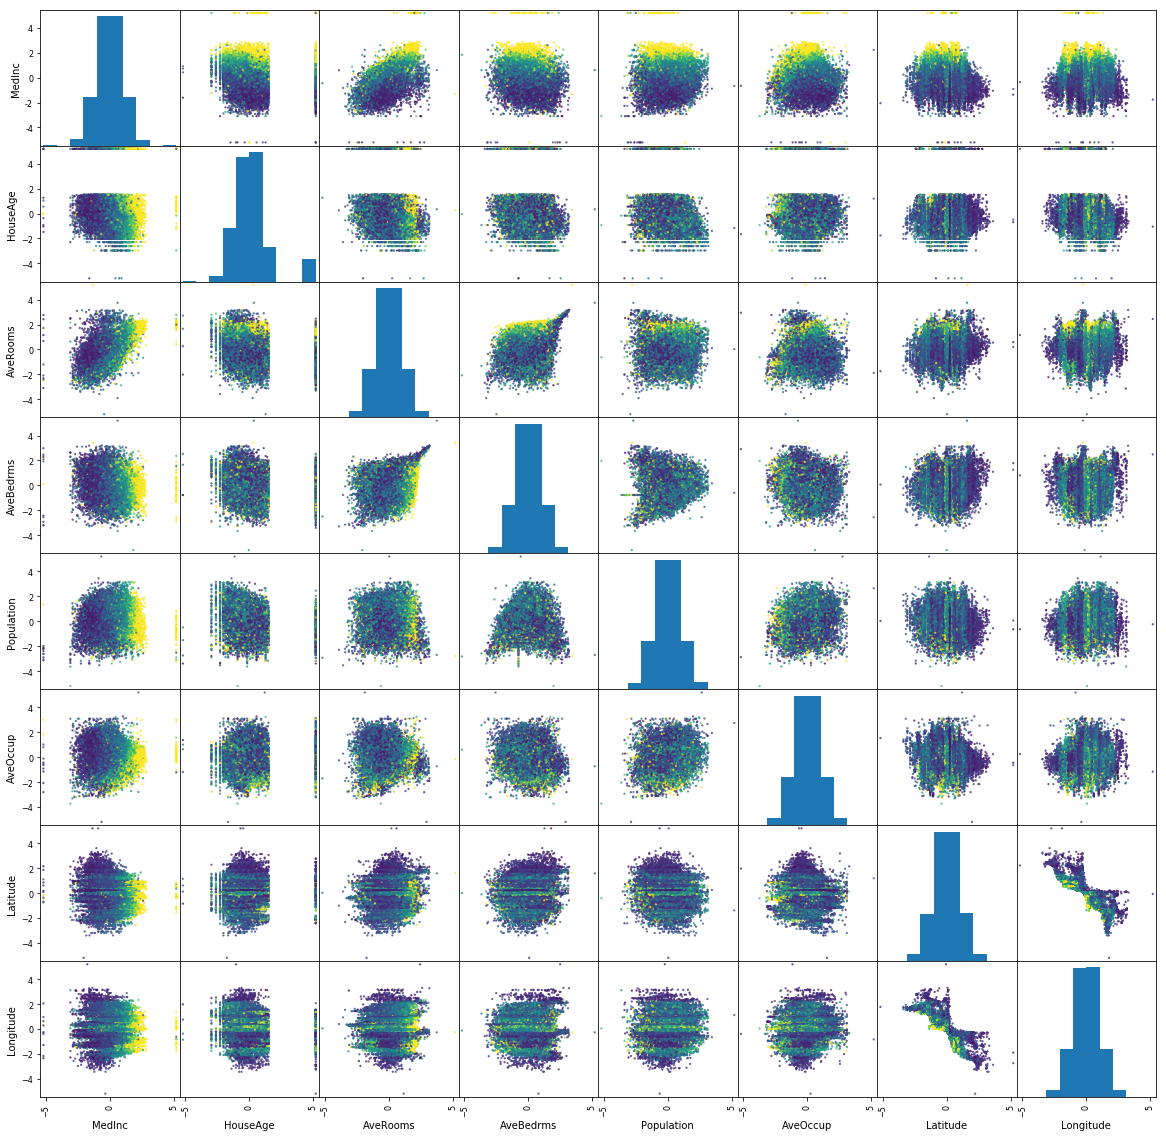

In [25]:
scatter_matrix(df_gauss, c=housing.target, alpha=0.8, figsize=(20, 20), s=20)
plt.show()

## Impact on the correlations

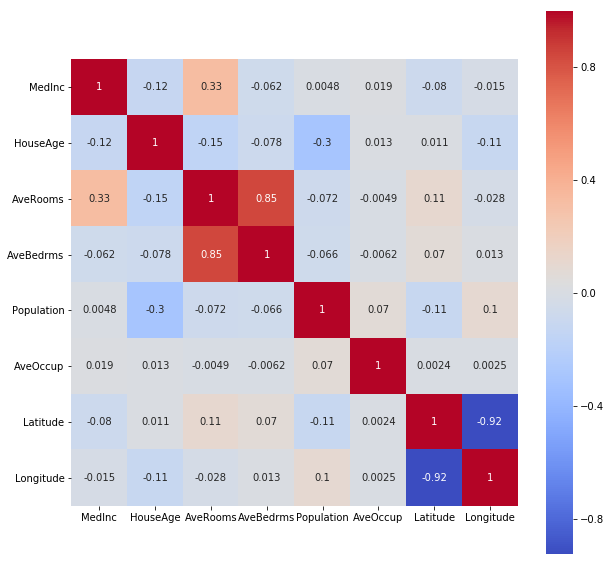

In [26]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

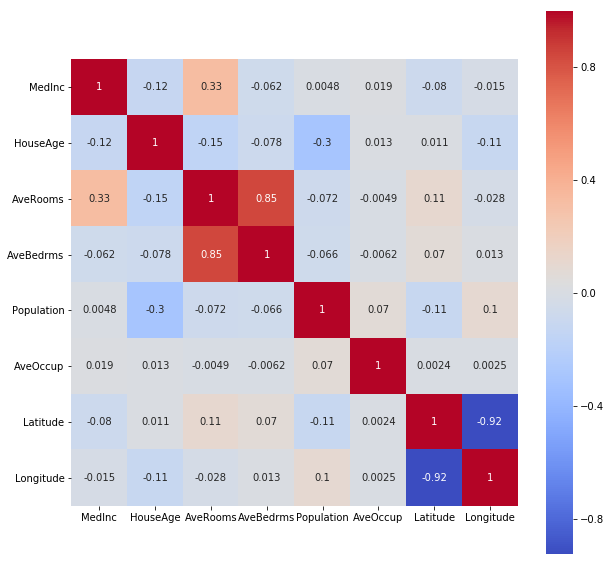

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df_robust.corr(), annot=True, square=True, cmap='coolwarm')

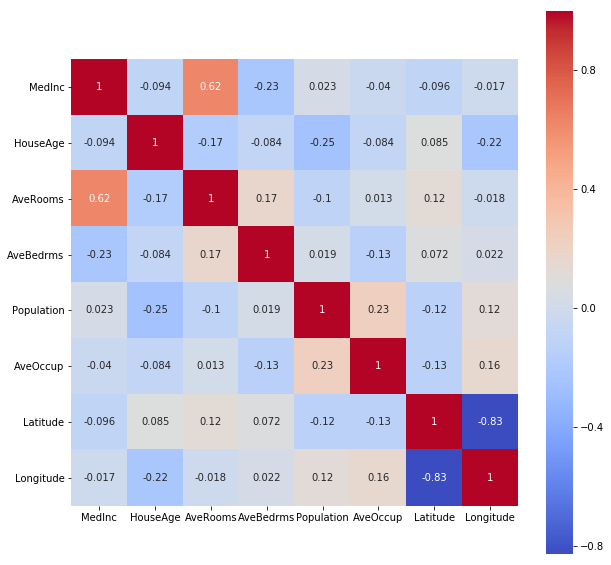

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df_gauss.corr(), annot=True, square=True, cmap='coolwarm')

Non-linear transformations smooth out distributions and are less influenced by outliers. However, they distort correlations and distances within and across features. There is no general answer, which scaler will work best for the problem. Like many things in machine learning, this is simply something one need to test/study.

# A DNN for regression

### Task 2: Design a DNN for this regression problem
* Prepare the data by creating a robust scaled design matrix and a minmax scaled target vector and split into training (70%) and test sample. 
* Design a simple fully-connected DNN for regression with 4 hidden layers. Use 30% of the training data for validation. Use `adam` as optimizer and set the batch size to 256. 
* What is a good activation function for the output node? What is a good loss function? 
* Train the DNN over 300 epochs and plot the loss function and one additional metric for linear regression as a function of epochs.
* Evaluate the obtained model on the testing data, compare the prediction to the true value.
* Use scikit-learn metrics for regression to evaluate the model
* Which feature has the highest linear correlation to the prediction? Plot the true value and the prediction dependent on this feature. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values, housing.target, test_size=0.3, random_state=42)

In [30]:
y_train

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ])

In [31]:
scaler = RobustScaler(quantile_range=(25, 75))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test = scaler_y.transform(y_test.reshape(-1, 1)).reshape(-1)
y_train

array([0.36866034, 0.31896982, 0.50474225, ..., 0.42701061, 0.55360803,
       0.63917468])

In [33]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=8))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8 , activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 11,761
Trainable params: 11,761
Non-trainable params: 0
_________________________________________________________________


### Training

In [35]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=300, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Train on 10113 samples, validate on 4335 samples
Epoch 1/300
10113/10113 [==============================] - 1s 109us/step - loss: 0.0423 - mean_absolute_error: 0.1584 - val_loss: 0.0283 - val_mean_absolute_error: 0.1219
Epoch 2/300
10113/10113 [==============================] - 0s 26us/step - loss: 0.0213 - mean_absolute_error: 0.1064 - val_loss: 0.0188 - val_mean_absolute_error: 0.0996
Epoch 3/300
10113/10113 [==============================] - 0s 26us/step - loss: 0.0163 - mean_absolute_error: 0.0916 - val_loss: 0.0173 - val_mean_absolute_error: 0.0929
Epoch 4/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0154 - mean_absolute_error: 0.0884 - val_loss: 0.0164 - val_mean_absolute_error: 0.0918
Epoch 5/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0147 - mean_absolute_error: 0.0859 - val_loss: 0.0159 - val_mean_absolute_error: 0.0885
Epoch 6/300
10113/10113 [===========================

Epoch 47/300
10113/10113 [==============================] - 0s 29us/step - loss: 0.0105 - mean_absolute_error: 0.0707 - val_loss: 0.0131 - val_mean_absolute_error: 0.0785
Epoch 48/300
10113/10113 [==============================] - 0s 30us/step - loss: 0.0107 - mean_absolute_error: 0.0710 - val_loss: 0.0136 - val_mean_absolute_error: 0.0792
Epoch 49/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0106 - mean_absolute_error: 0.0710 - val_loss: 0.0133 - val_mean_absolute_error: 0.0780
Epoch 50/300
10113/10113 [==============================] - 0s 26us/step - loss: 0.0104 - mean_absolute_error: 0.0706 - val_loss: 0.0131 - val_mean_absolute_error: 0.0775
Epoch 51/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0102 - mean_absolute_error: 0.0699 - val_loss: 0.0130 - val_mean_absolute_error: 0.0782
Epoch 52/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0102 - mean_absolute_error: 0.0699 - val_loss: 0.0133 - val_me

Epoch 95/300
10113/10113 [==============================] - 0s 20us/step - loss: 0.0084 - mean_absolute_error: 0.0637 - val_loss: 0.0129 - val_mean_absolute_error: 0.0762
Epoch 96/300
10113/10113 [==============================] - 1s 52us/step - loss: 0.0085 - mean_absolute_error: 0.0644 - val_loss: 0.0130 - val_mean_absolute_error: 0.0757
Epoch 97/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0086 - mean_absolute_error: 0.0647 - val_loss: 0.0133 - val_mean_absolute_error: 0.0783
Epoch 98/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0086 - mean_absolute_error: 0.0641 - val_loss: 0.0133 - val_mean_absolute_error: 0.0768
Epoch 99/300
10113/10113 [==============================] - 0s 35us/step - loss: 0.0086 - mean_absolute_error: 0.0646 - val_loss: 0.0130 - val_mean_absolute_error: 0.0753
Epoch 100/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0081 - mean_absolute_error: 0.0628 - val_loss: 0.0125 - val_m

Epoch 143/300
10113/10113 [==============================] - 0s 15us/step - loss: 0.0071 - mean_absolute_error: 0.0591 - val_loss: 0.0129 - val_mean_absolute_error: 0.0767
Epoch 144/300
10113/10113 [==============================] - 0s 18us/step - loss: 0.0071 - mean_absolute_error: 0.0595 - val_loss: 0.0129 - val_mean_absolute_error: 0.0758
Epoch 145/300
10113/10113 [==============================] - 0s 24us/step - loss: 0.0070 - mean_absolute_error: 0.0588 - val_loss: 0.0131 - val_mean_absolute_error: 0.0761
Epoch 146/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0072 - mean_absolute_error: 0.0595 - val_loss: 0.0128 - val_mean_absolute_error: 0.0756
Epoch 147/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0072 - mean_absolute_error: 0.0592 - val_loss: 0.0132 - val_mean_absolute_error: 0.0758
Epoch 148/300
10113/10113 [==============================] - 0s 23us/step - loss: 0.0071 - mean_absolute_error: 0.0590 - val_loss: 0.0131 - 

10113/10113 [==============================] - 0s 29us/step - loss: 0.0072 - mean_absolute_error: 0.0585 - val_loss: 0.0135 - val_mean_absolute_error: 0.0768
Epoch 191/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0062 - mean_absolute_error: 0.0558 - val_loss: 0.0135 - val_mean_absolute_error: 0.0755
Epoch 192/300
10113/10113 [==============================] - 0s 32us/step - loss: 0.0063 - mean_absolute_error: 0.0561 - val_loss: 0.0139 - val_mean_absolute_error: 0.0783
Epoch 193/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0064 - mean_absolute_error: 0.0565 - val_loss: 0.0134 - val_mean_absolute_error: 0.0771
Epoch 194/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0063 - mean_absolute_error: 0.0560 - val_loss: 0.0135 - val_mean_absolute_error: 0.0755
Epoch 195/300
10113/10113 [==============================] - 0s 16us/step - loss: 0.0060 - mean_absolute_error: 0.0550 - val_loss: 0.0136 - val_mean_absol

Epoch 238/300
10113/10113 [==============================] - 0s 23us/step - loss: 0.0057 - mean_absolute_error: 0.0536 - val_loss: 0.0139 - val_mean_absolute_error: 0.0792
Epoch 239/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0058 - mean_absolute_error: 0.0541 - val_loss: 0.0141 - val_mean_absolute_error: 0.0763
Epoch 240/300
10113/10113 [==============================] - 0s 29us/step - loss: 0.0058 - mean_absolute_error: 0.0536 - val_loss: 0.0140 - val_mean_absolute_error: 0.0768
Epoch 241/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0056 - mean_absolute_error: 0.0531 - val_loss: 0.0141 - val_mean_absolute_error: 0.0801
Epoch 242/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0057 - mean_absolute_error: 0.0537 - val_loss: 0.0144 - val_mean_absolute_error: 0.0767
Epoch 243/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0057 - mean_absolute_error: 0.0538 - val_loss: 0.0144 - 

10113/10113 [==============================] - 0s 33us/step - loss: 0.0053 - mean_absolute_error: 0.0521 - val_loss: 0.0140 - val_mean_absolute_error: 0.0764
Epoch 286/300
10113/10113 [==============================] - 0s 29us/step - loss: 0.0052 - mean_absolute_error: 0.0514 - val_loss: 0.0142 - val_mean_absolute_error: 0.0777
Epoch 287/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0053 - mean_absolute_error: 0.0513 - val_loss: 0.0143 - val_mean_absolute_error: 0.0783
Epoch 288/300
10113/10113 [==============================] - 0s 23us/step - loss: 0.0053 - mean_absolute_error: 0.0518 - val_loss: 0.0143 - val_mean_absolute_error: 0.0782
Epoch 289/300
10113/10113 [==============================] - 0s 24us/step - loss: 0.0053 - mean_absolute_error: 0.0518 - val_loss: 0.0146 - val_mean_absolute_error: 0.0786
Epoch 290/300
10113/10113 [==============================] - 0s 32us/step - loss: 0.0052 - mean_absolute_error: 0.0514 - val_loss: 0.0144 - val_mean_absol

During the training process we have saved the loss and the defined metrics of the training and validation data:

In [36]:
print(history.history.keys())

['val_mean_absolute_error', 'loss', 'mean_absolute_error', 'val_loss']


We can now plot the loss evolution over the training epochs for the training and validation dataset:

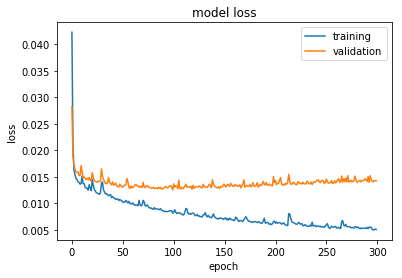

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Similarly, we can plot the mean absolute error 

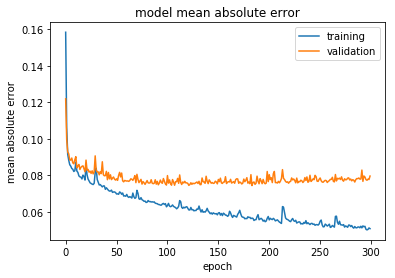

In [38]:
# summarize history for mse
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluation

Let's evaluate the loss and mean absolute error on our test data:

In [39]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=256)
print loss_and_metrics

6192/6192 [==============================] - 0s 13us/step
[0.013805297867561033, 0.07955923589856126]


Let's make the prediction for our test data:

In [40]:
print 'Testing...'
y_pred = model.predict(X_test, verbose = True, batch_size=256)

Testing...
6192/6192 [==============================] - 0s 21us/step


In [41]:
# predictions
y_pred.reshape(-1)

array([0.07388261, 0.18388203, 0.9883325 , ..., 0.38328034, 0.22460648,
       0.287174  ], dtype=float32)

In order to compare the test prediction with the training prediction, we will also obtain a training prediction:

In [42]:
y_train_pred = model.predict(X_train, verbose = True, batch_size=256)
y_train_pred = y_train_pred.reshape(-1)

14448/14448 [==============================] - 0s 5us/step


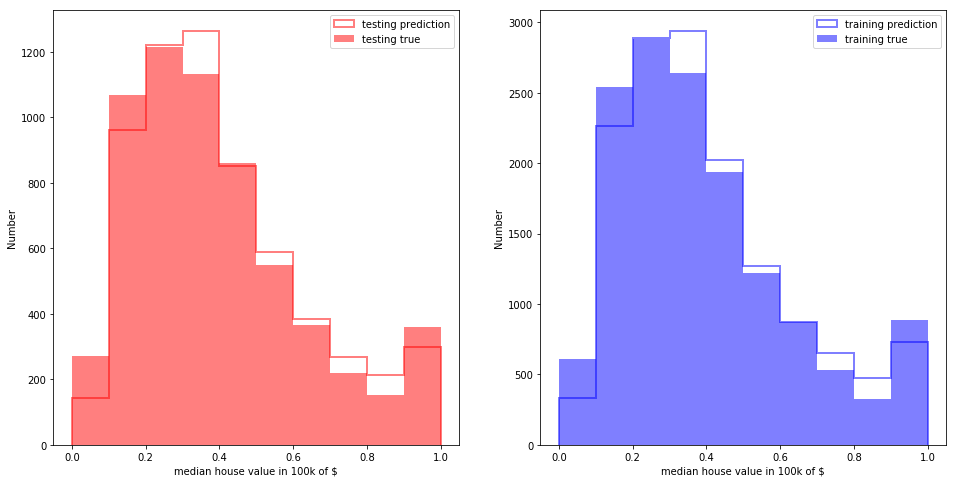

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.hist(y_test, alpha=0.5, color='red', range=[0, 1], bins=10)
plt.hist(y_pred, alpha=0.5, color='red', range=[0, 1], bins=10, histtype='step', linewidth=2)
plt.xlabel('median house value in 100k of $')
plt.ylabel('Number')
plt.legend(['testing prediction', 'testing true'], loc='upper right')
plt.subplot(122)
plt.hist(y_train, alpha=0.5, color='blue', range=[0, 1], bins=10)
plt.hist(y_train_pred, alpha=0.5, color='blue', range=[0, 1], bins=10, histtype='step', linewidth=2)
plt.xlabel('median house value in 100k of $')
plt.ylabel('Number')
plt.legend(['training prediction', 'training true'], loc='upper right')


How well do the histograms agree? We can use the Kolmogorov-Smirnov statistic to quantify that:

In [44]:
from scipy.stats import ks_2samp
print ('Testing KS:', ks_2samp(y_test, y_pred.reshape(-1)))
print ('Training KS:', ks_2samp(y_train, y_train_pred.reshape(-1)))

('Testing KS:', Ks_2sampResult(statistic=0.046834625322997425, pvalue=2.3797666210091484e-06))
('Training KS:', Ks_2sampResult(statistic=0.049210963455149526, pvalue=1.153721091524153e-15))


Alternatively, we could also look at the difference between the true and prediction values in order to see the spread on example basis:

(array([0.000e+00, 2.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 3.300e+01,
        4.800e+01, 1.460e+02, 4.270e+02, 1.898e+03, 2.633e+03, 7.290e+02,
        1.780e+02, 5.700e+01, 1.100e+01, 5.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

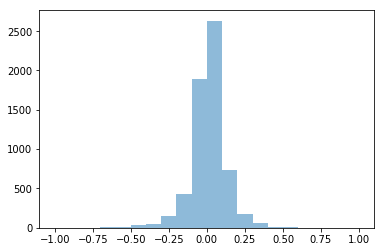

In [45]:
plt.hist(y_pred.reshape(-1)-y_test, alpha=0.5, range=[-1, 1], bins=20)

### Use the scikit learn metrics to evaluate the model

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))


Coefficient of determination: 0.75
Mean squared error: 0.01
Mean absolute error: 0.08


### Plot the correlations of the input features to the predictions 

In [47]:
df_out = pd.DataFrame(X_test, columns=housing.feature_names)

In [48]:
df_out.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.848027 -0.210526 -0.645394  -0.290855    0.239316  1.249230  0.473545   
1 -0.460004  0.052632 -0.119769   1.539384    0.424145 -0.161828  0.230159   
2 -0.026930  1.210526 -0.778816   1.457971    0.151709 -1.716414  0.933862   
3  1.003492 -0.631579  0.577761  -0.313113    0.573718  0.739080  0.002646   
4  0.084853  0.263158  0.161667  -0.229352   -0.112179 -0.392931  0.621693   

   Longitude  
0  -0.131926  
1  -0.250660  
2  -1.036939  
3  -0.055409  
4  -0.902375

In [50]:
df_out = df_out.assign(prediction=y_pred)
df_out.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.848027 -0.210526 -0.645394  -0.290855    0.239316  1.249230  0.473545   
1 -0.460004  0.052632 -0.119769   1.539384    0.424145 -0.161828  0.230159   
2 -0.026930  1.210526 -0.778816   1.457971    0.151709 -1.716414  0.933862   
3  1.003492 -0.631579  0.577761  -0.313113    0.573718  0.739080  0.002646   
4  0.084853  0.263158  0.161667  -0.229352   -0.112179 -0.392931  0.621693   

   Longitude  prediction  
0  -0.131926    0.073883  
1  -0.250660    0.183882  
2  -1.036939    0.988333  
3  -0.055409    0.545298  
4  -0.902375    0.570213

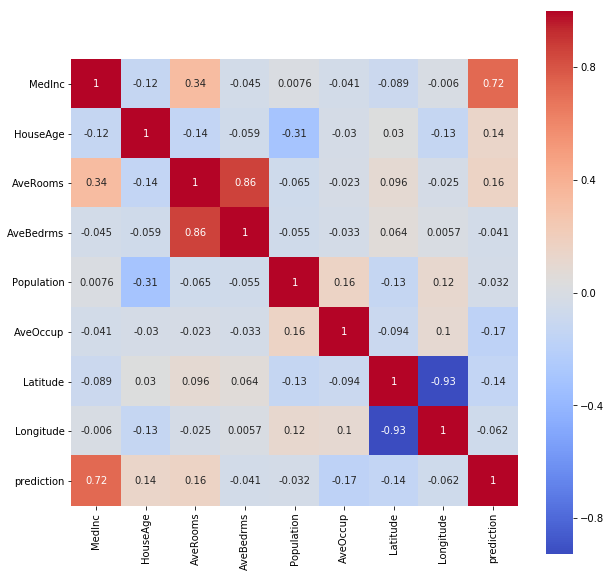

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df_out.corr(), annot=True, square=True, cmap='coolwarm')

### Plot the most important input feature dependent on the true value and the prediction

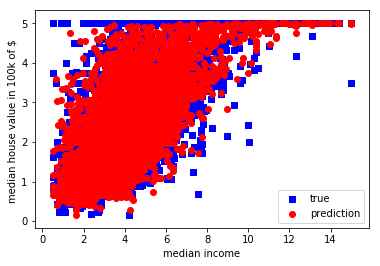

In [52]:
X_test = scaler.inverse_transform(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))
plt.scatter(X_test[:,0], y_test, c='blue', marker='s')
plt.scatter(X_test[:,0], y_pred, color='red')
plt.legend(['true', 'prediction'], loc='lower right')
plt.xlabel('median income')
plt.ylabel('median house value in 100k of $ ');

# Regularization

The training and validation loss function diverge during the training resulting in a considerably higher validation loss than the data. Can we use regularizer in order to control that? 

## L1/L2 Regularizer

### Task 3: Train and evaluate the same DNN with an L2 Regularizer
* The regularizer can be simply set by importing `from keras.regularizers import l2` and adding `kernel_regularizer=l2(l2_lambda)` as option to the Dense layer
* Choose l2_lambda=0.0001
* Perform the same scaling of the inputs
* How does the loss function evolution change?
* How does the performance and the prediction change?

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.as_matrix(), housing.target, test_size=0.3, random_state=42)

scaler = RobustScaler(quantile_range=(25, 75))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test = scaler_y.transform(y_test.reshape(-1, 1)).reshape(-1)
y_train

/home/nackenho/miniconda/envs/TUDortmundMLSeminar/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0.36866034, 0.31896982, 0.50474225, ..., 0.42701061, 0.55360803,
       0.63917468])

In [55]:
from keras.regularizers import l2
model = Sequential()
l2_lambda = 0.0001
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=8))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dense(units=8 , activation='relu', kernel_regularizer=l2(l2_lambda)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 11,761
Trainable params: 11,761
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=300, batch_size=256)

Train on 10113 samples, validate on 4335 samples
Epoch 1/300
10113/10113 [==============================] - 2s 193us/step - loss: 0.0507 - mean_absolute_error: 0.1479 - val_loss: 0.0371 - val_mean_absolute_error: 0.1133
Epoch 2/300
10113/10113 [==============================] - 0s 31us/step - loss: 0.0324 - mean_absolute_error: 0.0991 - val_loss: 0.0331 - val_mean_absolute_error: 0.0982
Epoch 3/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0295 - mean_absolute_error: 0.0934 - val_loss: 0.0306 - val_mean_absolute_error: 0.0961
Epoch 4/300
10113/10113 [==============================] - 0s 28us/step - loss: 0.0286 - mean_absolute_error: 0.0941 - val_loss: 0.0282 - val_mean_absolute_error: 0.0921
Epoch 5/300
10113/10113 [==============================] - 0s 33us/step - loss: 0.0260 - mean_absolute_error: 0.0878 - val_loss: 0.0269 - val_mean_absolute_error: 0.0885
Epoch 6/300
10113/10113 [==============================] - 0s 33us/step - loss: 0.0252 - mean_absolu

Epoch 49/300
10113/10113 [==============================] - 0s 21us/step - loss: 0.0175 - mean_absolute_error: 0.0835 - val_loss: 0.0183 - val_mean_absolute_error: 0.0857
Epoch 50/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0163 - mean_absolute_error: 0.0793 - val_loss: 0.0175 - val_mean_absolute_error: 0.0837
Epoch 51/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0158 - mean_absolute_error: 0.0775 - val_loss: 0.0173 - val_mean_absolute_error: 0.0836
Epoch 52/300
10113/10113 [==============================] - 0s 29us/step - loss: 0.0156 - mean_absolute_error: 0.0774 - val_loss: 0.0176 - val_mean_absolute_error: 0.0799
Epoch 53/300
10113/10113 [==============================] - 0s 22us/step - loss: 0.0154 - mean_absolute_error: 0.0767 - val_loss: 0.0179 - val_mean_absolute_error: 0.0857
Epoch 54/300
10113/10113 [==============================] - 0s 33us/step - loss: 0.0160 - mean_absolute_error: 0.0788 - val_loss: 0.0173 - val_me

Epoch 97/300
10113/10113 [==============================] - 0s 31us/step - loss: 0.0140 - mean_absolute_error: 0.0740 - val_loss: 0.0162 - val_mean_absolute_error: 0.0784
Epoch 98/300
10113/10113 [==============================] - 0s 39us/step - loss: 0.0136 - mean_absolute_error: 0.0725 - val_loss: 0.0153 - val_mean_absolute_error: 0.0774
Epoch 99/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0133 - mean_absolute_error: 0.0715 - val_loss: 0.0164 - val_mean_absolute_error: 0.0775
Epoch 100/300
10113/10113 [==============================] - 0s 38us/step - loss: 0.0136 - mean_absolute_error: 0.0725 - val_loss: 0.0155 - val_mean_absolute_error: 0.0757
Epoch 101/300
10113/10113 [==============================] - 0s 44us/step - loss: 0.0133 - mean_absolute_error: 0.0716 - val_loss: 0.0156 - val_mean_absolute_error: 0.0770
Epoch 102/300
10113/10113 [==============================] - 0s 43us/step - loss: 0.0134 - mean_absolute_error: 0.0719 - val_loss: 0.0151 - val

10113/10113 [==============================] - 0s 33us/step - loss: 0.0127 - mean_absolute_error: 0.0700 - val_loss: 0.0148 - val_mean_absolute_error: 0.0750
Epoch 145/300
10113/10113 [==============================] - 1s 51us/step - loss: 0.0126 - mean_absolute_error: 0.0695 - val_loss: 0.0149 - val_mean_absolute_error: 0.0761
Epoch 146/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0126 - mean_absolute_error: 0.0694 - val_loss: 0.0149 - val_mean_absolute_error: 0.0766
Epoch 147/300
10113/10113 [==============================] - 0s 40us/step - loss: 0.0125 - mean_absolute_error: 0.0692 - val_loss: 0.0146 - val_mean_absolute_error: 0.0757
Epoch 148/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0125 - mean_absolute_error: 0.0697 - val_loss: 0.0149 - val_mean_absolute_error: 0.0750
Epoch 149/300
10113/10113 [==============================] - 1s 63us/step - loss: 0.0126 - mean_absolute_error: 0.0696 - val_loss: 0.0148 - val_mean_absol

Epoch 192/300
10113/10113 [==============================] - 0s 28us/step - loss: 0.0121 - mean_absolute_error: 0.0679 - val_loss: 0.0145 - val_mean_absolute_error: 0.0744
Epoch 193/300
10113/10113 [==============================] - 0s 30us/step - loss: 0.0122 - mean_absolute_error: 0.0688 - val_loss: 0.0148 - val_mean_absolute_error: 0.0738
Epoch 194/300
10113/10113 [==============================] - 0s 28us/step - loss: 0.0122 - mean_absolute_error: 0.0685 - val_loss: 0.0147 - val_mean_absolute_error: 0.0769
Epoch 195/300
10113/10113 [==============================] - 0s 33us/step - loss: 0.0120 - mean_absolute_error: 0.0678 - val_loss: 0.0147 - val_mean_absolute_error: 0.0751
Epoch 196/300
10113/10113 [==============================] - 0s 27us/step - loss: 0.0121 - mean_absolute_error: 0.0681 - val_loss: 0.0145 - val_mean_absolute_error: 0.0742
Epoch 197/300
10113/10113 [==============================] - 0s 32us/step - loss: 0.0120 - mean_absolute_error: 0.0677 - val_loss: 0.0144 - 

10113/10113 [==============================] - 0s 35us/step - loss: 0.0119 - mean_absolute_error: 0.0682 - val_loss: 0.0143 - val_mean_absolute_error: 0.0752
Epoch 240/300
10113/10113 [==============================] - 0s 32us/step - loss: 0.0121 - mean_absolute_error: 0.0683 - val_loss: 0.0157 - val_mean_absolute_error: 0.0800
Epoch 241/300
10113/10113 [==============================] - 0s 35us/step - loss: 0.0122 - mean_absolute_error: 0.0692 - val_loss: 0.0145 - val_mean_absolute_error: 0.0765
Epoch 242/300
10113/10113 [==============================] - 0s 30us/step - loss: 0.0119 - mean_absolute_error: 0.0678 - val_loss: 0.0146 - val_mean_absolute_error: 0.0749
Epoch 243/300
10113/10113 [==============================] - 1s 51us/step - loss: 0.0119 - mean_absolute_error: 0.0677 - val_loss: 0.0148 - val_mean_absolute_error: 0.0733
Epoch 244/300
10113/10113 [==============================] - 1s 63us/step - loss: 0.0118 - mean_absolute_error: 0.0674 - val_loss: 0.0148 - val_mean_absol

Epoch 287/300
10113/10113 [==============================] - 0s 28us/step - loss: 0.0114 - mean_absolute_error: 0.0660 - val_loss: 0.0143 - val_mean_absolute_error: 0.0745
Epoch 288/300
10113/10113 [==============================] - 0s 26us/step - loss: 0.0116 - mean_absolute_error: 0.0668 - val_loss: 0.0144 - val_mean_absolute_error: 0.0735
Epoch 289/300
10113/10113 [==============================] - 0s 32us/step - loss: 0.0115 - mean_absolute_error: 0.0663 - val_loss: 0.0146 - val_mean_absolute_error: 0.0737
Epoch 290/300
10113/10113 [==============================] - 0s 36us/step - loss: 0.0118 - mean_absolute_error: 0.0672 - val_loss: 0.0143 - val_mean_absolute_error: 0.0741
Epoch 291/300
10113/10113 [==============================] - 0s 34us/step - loss: 0.0116 - mean_absolute_error: 0.0670 - val_loss: 0.0147 - val_mean_absolute_error: 0.0768
Epoch 292/300
10113/10113 [==============================] - 0s 35us/step - loss: 0.0115 - mean_absolute_error: 0.0665 - val_loss: 0.0144 - 

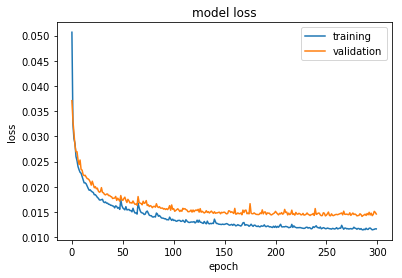

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [58]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=256)
print loss_and_metrics
y_pred = model.predict(X_test, verbose = True, batch_size=256)

6192/6192 [==============================] - 0s 18us/step
[0.013912828256513259, 0.07427210252953438]
6192/6192 [==============================] - 0s 46us/step


In [59]:
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Coefficient of determination: 0.79
Mean squared error: 0.01
Mean absolute error: 0.07


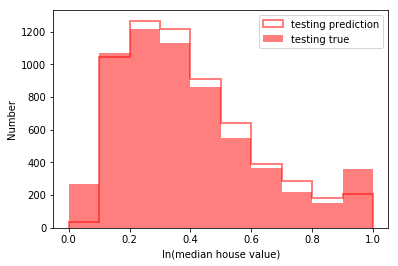

In [60]:
# predictions
y_pred.reshape(-1)

plt.hist(y_test, alpha=0.5, color='red', range=[0, 1], bins=10)
plt.hist(y_pred, alpha=0.5, color='red', range=[0, 1], bins=10, histtype='step', linewidth=2)
plt.xlabel('ln(median house value)')
plt.ylabel('Number')
plt.legend(['testing prediction', 'testing true'], loc='upper right')

## Dropout

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.as_matrix(), housing.target, test_size=0.3, random_state=42)

scaler = RobustScaler(quantile_range=(25, 75))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test = scaler_y.transform(y_test.reshape(-1, 1)).reshape(-1)
y_train

/home/nackenho/miniconda/envs/TUDortmundMLSeminar/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0.36866034, 0.31896982, 0.50474225, ..., 0.42701061, 0.55360803,
       0.63917468])

In [62]:
from keras.layers import Dropout
model = Sequential()
dropout=0.2
model.add(Dense(units=128, activation='relu', input_dim=8))
model.add(Dropout(dropout))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=8 , activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
___________________________

In [63]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=300, batch_size=256)

Train on 10113 samples, validate on 4335 samples
Epoch 1/300
10113/10113 [==============================] - 2s 180us/step - loss: 0.0527 - mean_absolute_error: 0.1883 - val_loss: 0.0306 - val_mean_absolute_error: 0.1346
Epoch 2/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0321 - mean_absolute_error: 0.1374 - val_loss: 0.0226 - val_mean_absolute_error: 0.1130
Epoch 3/300
10113/10113 [==============================] - 0s 48us/step - loss: 0.0260 - mean_absolute_error: 0.1212 - val_loss: 0.0191 - val_mean_absolute_error: 0.1008
Epoch 4/300
10113/10113 [==============================] - 1s 58us/step - loss: 0.0229 - mean_absolute_error: 0.1130 - val_loss: 0.0184 - val_mean_absolute_error: 0.0973
Epoch 5/300
10113/10113 [==============================] - 1s 51us/step - loss: 0.0221 - mean_absolute_error: 0.1105 - val_loss: 0.0174 - val_mean_absolute_error: 0.0948
Epoch 6/300
10113/10113 [==============================] - 1s 57us/step - loss: 0.0210 - mean_absolu

Epoch 49/300
10113/10113 [==============================] - 0s 46us/step - loss: 0.0148 - mean_absolute_error: 0.0866 - val_loss: 0.0141 - val_mean_absolute_error: 0.0805
Epoch 50/300
10113/10113 [==============================] - 1s 60us/step - loss: 0.0147 - mean_absolute_error: 0.0863 - val_loss: 0.0138 - val_mean_absolute_error: 0.0793
Epoch 51/300
10113/10113 [==============================] - 0s 49us/step - loss: 0.0146 - mean_absolute_error: 0.0859 - val_loss: 0.0137 - val_mean_absolute_error: 0.0794
Epoch 52/300
10113/10113 [==============================] - 0s 39us/step - loss: 0.0144 - mean_absolute_error: 0.0850 - val_loss: 0.0138 - val_mean_absolute_error: 0.0787
Epoch 53/300
10113/10113 [==============================] - 1s 66us/step - loss: 0.0145 - mean_absolute_error: 0.0858 - val_loss: 0.0137 - val_mean_absolute_error: 0.0796
Epoch 54/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0142 - mean_absolute_error: 0.0850 - val_loss: 0.0137 - val_me

Epoch 97/300
10113/10113 [==============================] - 1s 50us/step - loss: 0.0129 - mean_absolute_error: 0.0795 - val_loss: 0.0125 - val_mean_absolute_error: 0.0757
Epoch 98/300
10113/10113 [==============================] - 1s 56us/step - loss: 0.0128 - mean_absolute_error: 0.0799 - val_loss: 0.0125 - val_mean_absolute_error: 0.0749
Epoch 99/300
10113/10113 [==============================] - 1s 60us/step - loss: 0.0130 - mean_absolute_error: 0.0800 - val_loss: 0.0126 - val_mean_absolute_error: 0.0737
Epoch 100/300
10113/10113 [==============================] - 1s 51us/step - loss: 0.0132 - mean_absolute_error: 0.0807 - val_loss: 0.0125 - val_mean_absolute_error: 0.0741
Epoch 101/300
10113/10113 [==============================] - 1s 57us/step - loss: 0.0128 - mean_absolute_error: 0.0799 - val_loss: 0.0123 - val_mean_absolute_error: 0.0734
Epoch 102/300
10113/10113 [==============================] - 0s 46us/step - loss: 0.0127 - mean_absolute_error: 0.0795 - val_loss: 0.0124 - val

10113/10113 [==============================] - 0s 28us/step - loss: 0.0119 - mean_absolute_error: 0.0767 - val_loss: 0.0119 - val_mean_absolute_error: 0.0724
Epoch 145/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0118 - mean_absolute_error: 0.0767 - val_loss: 0.0119 - val_mean_absolute_error: 0.0727
Epoch 146/300
10113/10113 [==============================] - 1s 55us/step - loss: 0.0118 - mean_absolute_error: 0.0767 - val_loss: 0.0121 - val_mean_absolute_error: 0.0732
Epoch 147/300
10113/10113 [==============================] - 0s 49us/step - loss: 0.0118 - mean_absolute_error: 0.0768 - val_loss: 0.0119 - val_mean_absolute_error: 0.0721
Epoch 148/300
10113/10113 [==============================] - 1s 65us/step - loss: 0.0118 - mean_absolute_error: 0.0764 - val_loss: 0.0126 - val_mean_absolute_error: 0.0723
Epoch 149/300
10113/10113 [==============================] - 1s 59us/step - loss: 0.0119 - mean_absolute_error: 0.0768 - val_loss: 0.0121 - val_mean_absol

10113/10113 [==============================] - 0s 37us/step - loss: 0.0113 - mean_absolute_error: 0.0750 - val_loss: 0.0121 - val_mean_absolute_error: 0.0708
Epoch 192/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0110 - mean_absolute_error: 0.0737 - val_loss: 0.0121 - val_mean_absolute_error: 0.0720
Epoch 193/300
10113/10113 [==============================] - 1s 54us/step - loss: 0.0112 - mean_absolute_error: 0.0742 - val_loss: 0.0119 - val_mean_absolute_error: 0.0715
Epoch 194/300
10113/10113 [==============================] - 1s 56us/step - loss: 0.0111 - mean_absolute_error: 0.0743 - val_loss: 0.0118 - val_mean_absolute_error: 0.0710
Epoch 195/300
10113/10113 [==============================] - 1s 70us/step - loss: 0.0112 - mean_absolute_error: 0.0750 - val_loss: 0.0118 - val_mean_absolute_error: 0.0720
Epoch 196/300
10113/10113 [==============================] - 0s 49us/step - loss: 0.0116 - mean_absolute_error: 0.0756 - val_loss: 0.0120 - val_mean_absol

Epoch 239/300
10113/10113 [==============================] - 0s 45us/step - loss: 0.0106 - mean_absolute_error: 0.0728 - val_loss: 0.0117 - val_mean_absolute_error: 0.0705
Epoch 240/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0106 - mean_absolute_error: 0.0727 - val_loss: 0.0116 - val_mean_absolute_error: 0.0705
Epoch 241/300
10113/10113 [==============================] - 0s 45us/step - loss: 0.0105 - mean_absolute_error: 0.0725 - val_loss: 0.0117 - val_mean_absolute_error: 0.0701
Epoch 242/300
10113/10113 [==============================] - 0s 43us/step - loss: 0.0106 - mean_absolute_error: 0.0727 - val_loss: 0.0120 - val_mean_absolute_error: 0.0718
Epoch 243/300
10113/10113 [==============================] - 0s 40us/step - loss: 0.0108 - mean_absolute_error: 0.0728 - val_loss: 0.0120 - val_mean_absolute_error: 0.0714
Epoch 244/300
10113/10113 [==============================] - 0s 38us/step - loss: 0.0109 - mean_absolute_error: 0.0738 - val_loss: 0.0117 - 

10113/10113 [==============================] - 0s 41us/step - loss: 0.0106 - mean_absolute_error: 0.0724 - val_loss: 0.0118 - val_mean_absolute_error: 0.0705
Epoch 287/300
10113/10113 [==============================] - 0s 45us/step - loss: 0.0105 - mean_absolute_error: 0.0725 - val_loss: 0.0118 - val_mean_absolute_error: 0.0715
Epoch 288/300
10113/10113 [==============================] - 0s 41us/step - loss: 0.0106 - mean_absolute_error: 0.0726 - val_loss: 0.0116 - val_mean_absolute_error: 0.0705
Epoch 289/300
10113/10113 [==============================] - 1s 78us/step - loss: 0.0105 - mean_absolute_error: 0.0726 - val_loss: 0.0118 - val_mean_absolute_error: 0.0707
Epoch 290/300
10113/10113 [==============================] - 1s 120us/step - loss: 0.0105 - mean_absolute_error: 0.0719 - val_loss: 0.0117 - val_mean_absolute_error: 0.0705
Epoch 291/300
10113/10113 [==============================] - 1s 95us/step - loss: 0.0101 - mean_absolute_error: 0.0712 - val_loss: 0.0118 - val_mean_abso

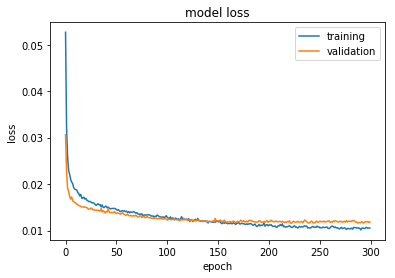

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

**You have to treat this result with care:** The training loss is evaluated after each batch, where nodes are dropped, while the validation loss is calculated after one epoch, where all nodes are included.

In [65]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=256)
print loss_and_metrics
y_pred = model.predict(X_test, verbose = True, batch_size=256)

6192/6192 [==============================] - 0s 26us/step
[0.011237409165567052, 0.06979525052684839]
6192/6192 [==============================] - 1s 83us/step


In [66]:
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The mean squared error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Coefficient of determination: 0.80
Mean squared error: 0.01
Mean absolute error: 0.07


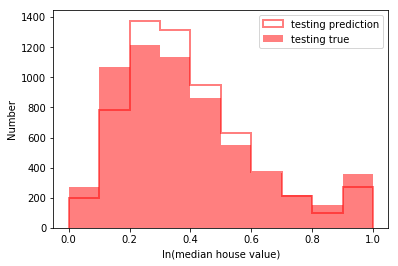

In [67]:
# predictions
y_pred.reshape(-1)

plt.hist(y_test, alpha=0.5, color='red', range=[0, 1], bins=10)
plt.hist(y_pred, alpha=0.5, color='red', range=[0, 1], bins=10, histtype='step', linewidth=2)
plt.xlabel('ln(median house value)')
plt.ylabel('Number')
plt.legend(['testing prediction', 'testing true'], loc='upper right')

## Task 4 (Bonus) - Playtime
* What do you need to change in the DNN if you don't scale the target vector?
* How does the result change if you use a quantile transformer with uniform output?
* How does the L1 regularizer perform?
* What happens if you change the L2 regularizer strength?
* What happens if you change the drop out percentage?
* How does the result change if you use only the 3 most important features?